In [1]:
EXPERIMENT_ID = "test_1"

In [2]:
%load_ext autoreload
%autoreload 2

import pathlib

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = "20"

from data_handlers.network import parse_bwms
from data_handlers.procmem import parse_pidstat

In [3]:
experiment_path = pathlib.Path(f"/home/jovyan/work/binary_files/{EXPERIMENT_ID}")

In [4]:
network_df = parse_bwms(experiment_path)

ValueError: No objects to concatenate

In [5]:
procmem_df = parse_pidstat(experiment_path)

In [6]:
df_groups = ['id', 'routing', 'node', 'dt']

In [25]:
clean_network = network_df.groupby(['id', 'routing', 'dt']).sum()
clean_network['Mbit/s'] = clean_network['bytes_out/s'] / 1024 / 1024 * 8

In [26]:
clean_network

level_0  index  bytes_out/s  Mbit/s
id routing  dt                                         
1  epidemic 0.0           0      2          0.0     0.0
            0.0           1      2          0.0     0.0
            0.0           2      2          0.0     0.0
            0.0           3      2          0.0     0.0
            0.0           4      2          0.0     0.0
...                     ...    ...          ...     ...
            1814.6    90699   5444          0.0     0.0
            1814.7    90700   5444          0.0     0.0
            1814.7    90701   5444          0.0     0.0
            1814.8    90702   5444          0.0     0.0
            1814.8    90703   5444          0.0     0.0

[90699 rows x 4 columns]

In [14]:
clean_procmem = procmem_df.groupby(['id', 'routing', 'dt']).sum()
clean_procmem = clean_procmem[['%CPU', 'RSS']]

In [15]:
merged = clean_network.merge(clean_procmem, left_index=True, right_index=True)

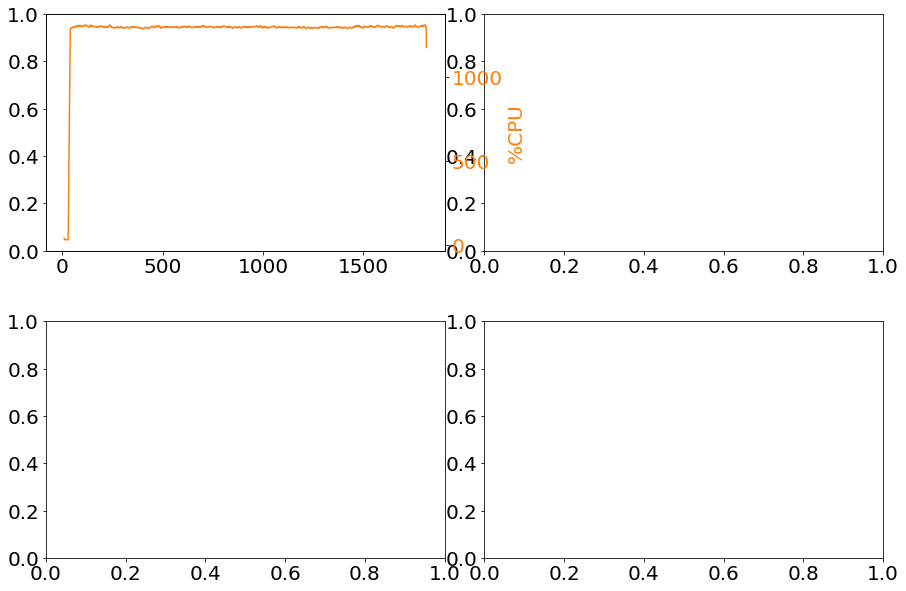

In [93]:
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=.1, hspace=.3)

fig.set_size_inches(15,10)

color_mbit = 'C0'
color_cpu = 'C1'

for ax, (name, routing_df) in zip(list(axs[0]) + list(axs[1]), clean_procmem.groupby(['routing'])):
    #ax.tick_params(axis='y', labelcolor=color_mbit)
    #ax.set_xlim(-10, 210)
    #ax.set_ylim(0.01, 101)
    #ax.set_title(name)
    
    ax2 = ax.twinx()
    ax2.tick_params(axis='y', labelcolor=color_cpu)
    #ax2.set_ylim(0.01, 200)
                    
    routing_df = routing_df.reset_index()

    #sns.lineplot(
    #    x=routing_df['dt'],
    #    y=routing_df['Mbit/s'].rolling(1000).mean(),
    #    ax=ax,
    #    color=color_mbit
    #)

    sns.lineplot(
        x=routing_df['dt'],
        y=routing_df['%CPU'].rolling(10).mean(),
        ax=ax2,
        color=color_cpu
    )

    #ax.set_ylabel('Mbit/s', color=color_mbit)
    ax2.set_ylabel('%CPU', color=color_cpu)
                        
plt.savefig('cpu_network.pdf')
#plt.show()